# Touch of Modern Business Intelligence Case Study

In [1]:
## IMPORT NECESSARY LIBRARIES
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
## LOAD CSV INTO DATAFRAMES
users = pd.read_csv('users.csv')
orders = pd.read_csv('orders.csv')
joint = pd.read_csv('joinedorders.csv')
user_e = pd.read_csv('user_exploration.csv')

## Examing and cleaning the data

In [3]:
users

,id,gender,age,country,days_on_site_in_2016
0,1,M,21,US,1
1,2,F,46,US,10
2,3,NaN,26,US,4
3,4,NaN,54,US,7
4,5,F,34,US,38
...,...,...,...,...,...
9995,9996,NaN,22,US,9
9996,9997,F,50,US,15
9997,9998,NaN,44,US,3
9998,9999,M,31,US,28


In [4]:
orders

,id,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject
0,1,9852,2016-01-01 0:03:11,60.69,10,NaN,False
1,2,2784,2016-01-01 0:09:32,123.91,15,NaN,False
2,3,1619,2016-01-01 0:17:26,119.75,15,NaN,False
3,4,9725,2016-01-01 0:44:04,151.92,15,NaN,False
4,5,8892,2016-01-01 0:52:23,153.27,15,NaN,False
...,...,...,...,...,...,...,...
51733,51734,2838,2016-12-31 23:13:17,97.29,10,NaN,False
51734,51735,172,2016-12-31 23:15:35,147.62,15,NaN,False
51735,51736,1974,2016-12-31 23:15:39,159.71,15,NaN,False
51736,51737,2599,2016-12-31 23:24:11,173.22,15,NaN,False


In [65]:
joint

,id,user_id,order_date,item_total,shipping_cost,discount_applied,payment_reject,gender,age,country,daysonsite
0,1,9852,2016-01-01,60.69,10,NaN,False,NaN,26,US,29
1,2,2784,2016-01-01,123.91,15,NaN,False,NaN,47,US,28
2,3,1619,2016-01-01,119.75,15,NaN,False,M,40,US,29
3,4,9725,2016-01-01,151.92,15,NaN,False,F,40,US,3
4,5,8892,2016-01-01,153.27,15,NaN,False,NaN,32,US,10
...,...,...,...,...,...,...,...,...,...,...,...
51733,51734,2838,2016-12-31,97.29,10,NaN,False,NaN,25,US,19
51734,51735,172,2016-12-31,147.62,15,NaN,False,M,37,US,37
51735,51736,1974,2016-12-31,159.71,15,NaN,False,NaN,36,US,49
51736,51737,2599,2016-12-31,173.22,15,NaN,False,NaN,48,US,3


In [34]:
## CONVERTS DATA TYPE TO DATETIME
joint['order_date'] = joint[['order_date']].apply(pd.to_datetime)

In [100]:
## FILLS NULL WITH 0
user_e["total"].fillna(0, inplace = True)

In [80]:
user_e

,id,gender,age,country,daysonsite,total
0,1,M,21,US,1,NaN
1,2,F,46,US,10,1169.40
2,3,NaN,26,US,4,244.73
3,4,NaN,54,US,7,336.20
4,5,F,34,US,38,1887.80
...,...,...,...,...,...,...
9995,9996,NaN,22,US,9,391.69
9996,9997,F,50,US,15,1363.96
9997,9998,NaN,44,US,3,281.04
9998,9999,M,31,US,28,1676.46


## Plotting data

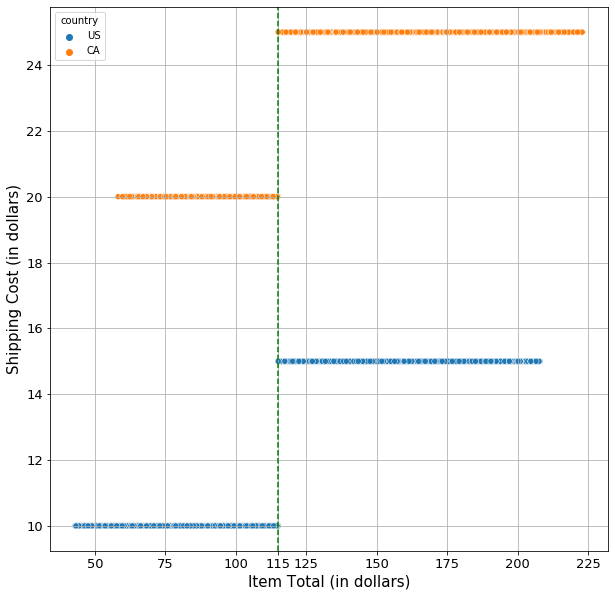

In [98]:
## PLOTS CORRELATION BETWEEN SHIPPING COST, ITEM VALUE, AND COUNTRY
plt.figure(figsize=(10, 10))
plt.axvline(115, color='g', linestyle='--')
plt.xticks([50,75,100,115,125,150,175,200,225])
plt.grid()
plt.xlabel("Item Total (in dollars)",fontsize=15)
plt.ylabel("Shipping Cost (in dollars)",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=13)
ax = sns.scatterplot(x=joint['item_total'],y=joint['shipping_cost'], hue=joint['country'])

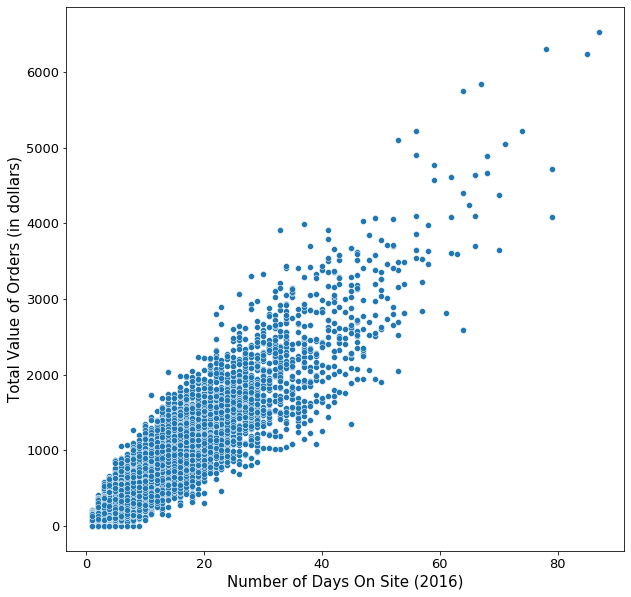

In [103]:
## PLOTS CORRELATION BETWEEN DAYS ON SITE AND TOTAL VALUE OF ORDERS PER USER
plt.figure(figsize=(10, 10))
plt.xlabel('Number of Days On Site (2016)', fontsize=15)
plt.ylabel('Total Value of Orders (in dollars)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=13)
sns.scatterplot(x=user_e['daysonsite'],y=user_e['total'])